# Data overview

Let's form the first insight from bank client data

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load source of data (csv file)

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t', parse_dates=True)

Print 10 random rows of the table to get an overview of its structure

In [3]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1970,9,4650000.0,41.10,2018-07-05T00:00:00,1,NaN,25.0,17.00,6,NaN,...,10.00,1.0,Санкт-Петербург,37948.0,14769.0,0.0,NaN,0.0,NaN,97.0
19555,4,650000.0,40.00,2017-06-02T00:00:00,2,NaN,5.0,NaN,5,NaN,...,NaN,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,245.0
18514,1,9200000.0,83.00,2016-12-11T00:00:00,3,NaN,3.0,51.00,3,NaN,...,10.00,0.0,Санкт-Петербург,22017.0,1803.0,0.0,NaN,2.0,50.0,164.0
5411,5,2950000.0,57.61,2018-02-27T00:00:00,2,2.60,4.0,37.13,1,NaN,...,10.00,NaN,посёлок Щеглово,NaN,NaN,NaN,NaN,NaN,NaN,41.0
9789,3,10600000.0,106.00,2015-05-13T00:00:00,5,3.40,5.0,76.30,2,NaN,...,10.00,0.0,Санкт-Петербург,26301.0,4876.0,0.0,NaN,1.0,651.0,637.0
2455,11,2100000.0,33.00,2019-03-26T00:00:00,1,2.75,4.0,19.00,3,NaN,...,5.50,NaN,село Павлово,NaN,NaN,NaN,NaN,NaN,NaN,29.0
4453,20,12350000.0,86.70,2019-02-07T00:00:00,4,2.50,7.0,59.20,6,NaN,...,10.64,2.0,Санкт-Петербург,33841.0,11751.0,0.0,NaN,0.0,NaN,NaN
4016,7,5200000.0,68.00,2017-02-13T00:00:00,3,2.80,5.0,53.00,5,False,...,8.00,1.0,Санкт-Петербург,17133.0,6074.0,2.0,310.0,0.0,NaN,489.0
13812,8,3000000.0,44.00,2018-03-03T00:00:00,2,2.50,5.0,23.00,5,NaN,...,5.00,1.0,посёлок городского типа имени Свердлова,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18840,18,5900000.0,56.00,2017-10-03T00:00:00,2,NaN,10.0,30.00,7,NaN,...,8.00,0.0,Санкт-Петербург,34416.0,12530.0,0.0,NaN,1.0,842.0,11.0


Get general information about the data in the table

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Let's look at % of missing data for each of the features

In [6]:
pd.DataFrame(round(data.isna().mean()*100, 1)).style.format('{:.1f}%').background_gradient('coolwarm')

,0
total_images,0.0%
last_price,0.0%
total_area,0.0%
first_day_exposition,0.0%
rooms,0.0%
ceiling_height,38.8%
floors_total,0.4%
living_area,8.0%
floor,0.0%
is_apartment,88.3%


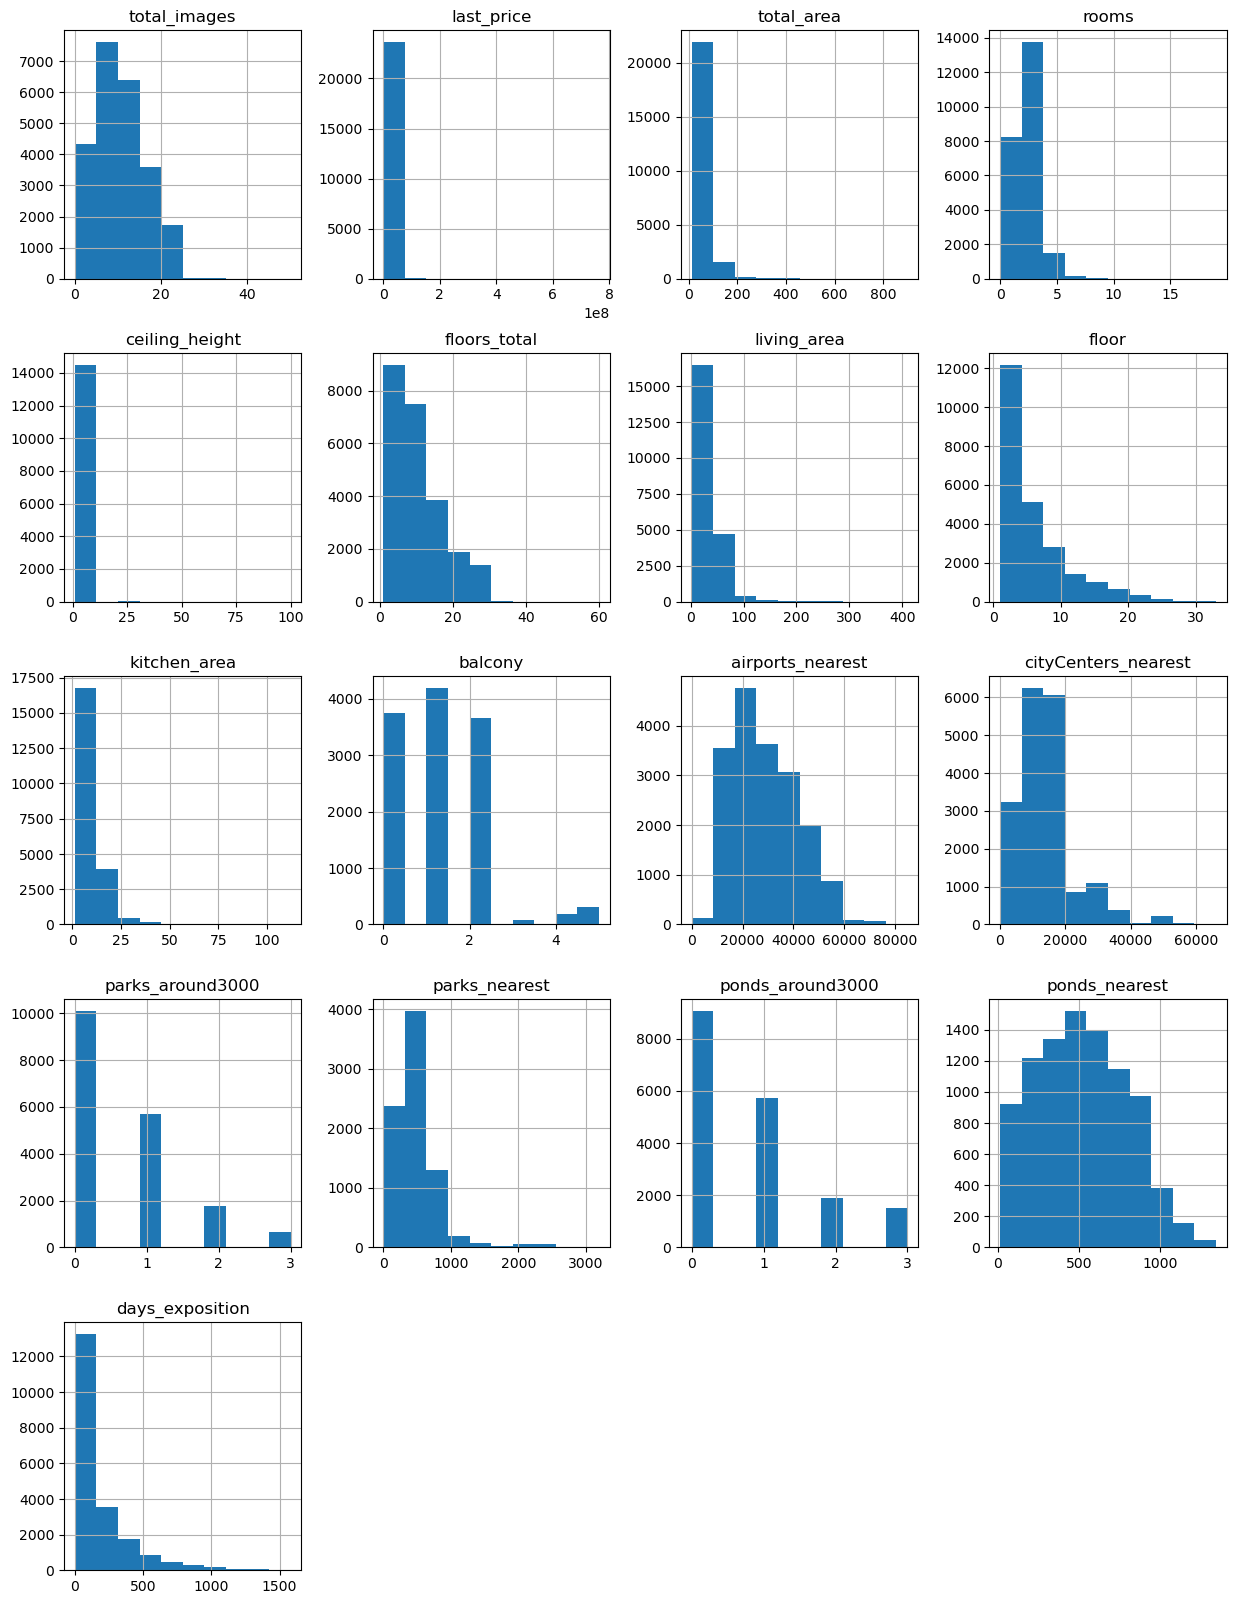

In [7]:
data.hist(figsize=(15, 20))

plt.show()

## Section 1 conclusions

- A more detailed description on a number of features will follow below. Here we note that 14 out of 21 columns have gaps. Also some of the columns need to be preprocessed, taking into account the large % of missing data and their business meaning.

# Data preprocessing

Let's consider all 14 features with missing values step by step

##  first_day_exposition

Convert the date data into the standard format

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['first_day_exposition'].sample(5)

1393    2018-02-21
667     2017-02-08
10654   2018-12-13
17779   2017-08-09
22410   2016-03-28
Name: first_day_exposition, dtype: datetime64[ns]

## ceiling_height

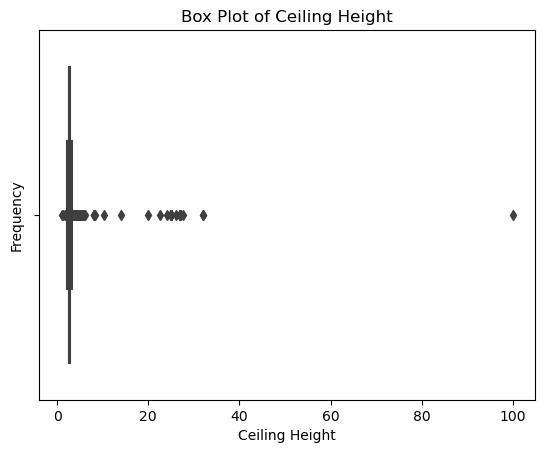

In [9]:
sns.boxplot(x="ceiling_height", data=data)

plt.title("Box Plot of Ceiling Height")
plt.xlabel("Ceiling Height")
plt.ylabel("Frequency")

plt.show()

Let's look at the percentile distribution

In [10]:
for i in range(2, 100, 2):
    print('percentile_{0}: {1}'.format(i, data['ceiling_height'].quantile(i/100)))

percentile_2: 2.5
percentile_4: 2.5
percentile_6: 2.5
percentile_8: 2.5
percentile_10: 2.5
percentile_12: 2.5
percentile_14: 2.5
percentile_16: 2.5
percentile_18: 2.5
percentile_20: 2.5
percentile_22: 2.5
percentile_24: 2.5
percentile_26: 2.54
percentile_28: 2.55
percentile_30: 2.55
percentile_32: 2.55
percentile_34: 2.56
percentile_36: 2.6
percentile_38: 2.6
percentile_40: 2.6
percentile_42: 2.6
percentile_44: 2.6
percentile_46: 2.6
percentile_48: 2.65
percentile_50: 2.65
percentile_52: 2.65
percentile_54: 2.7
percentile_56: 2.7
percentile_58: 2.7
percentile_60: 2.7
percentile_62: 2.7
percentile_64: 2.73
percentile_66: 2.75
percentile_68: 2.75
percentile_70: 2.75
percentile_72: 2.8
percentile_74: 2.8
percentile_76: 2.8
percentile_78: 2.8
percentile_80: 2.87
percentile_82: 3.0
percentile_84: 3.0
percentile_86: 3.0
percentile_88: 3.0
percentile_90: 3.06
percentile_92: 3.15
percentile_94: 3.2
percentile_96: 3.35
percentile_98: 3.54


Let's replace outliers with percentile 2 and 98, missing values with median and then build ditribution chart

In [11]:
upper_threshold = data['ceiling_height'].quantile(0.98)
lower_threshold = data['ceiling_height'].quantile(0.02)
median = data['ceiling_height'].median()

def ceiling_height(cell):
    if cell > upper_threshold:
        result = upper_threshold
    elif cell < lower_threshold:
        result = lower_threshold
    elif pd.isna(cell):
        result = median
    else:
        result = cell
    return result

In [12]:
data['ceiling_height'] = data.apply(lambda x: ceiling_height(x['ceiling_height']), axis=1)
data['ceiling_height'].describe()

count    23699.000000
mean         2.694471
std          0.199224
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.540000
Name: ceiling_height, dtype: float64

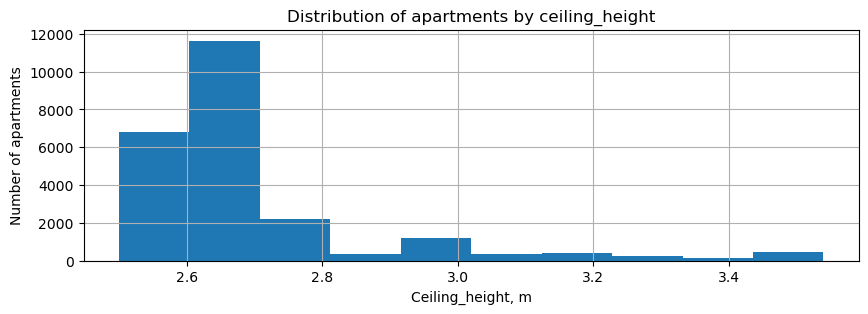

In [13]:
data['ceiling_height'].hist(range=(data['ceiling_height'].min(), data['ceiling_height'].max()), figsize=(10, 3))

plt.xlabel('Ceiling_height, m')
plt.ylabel('Number of apartments')
plt.title('Distribution of apartments by ceiling_height')

plt.show()

## floors_total

In [14]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Let's fill in the blanks with the median

In [15]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

## living_area

In [16]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

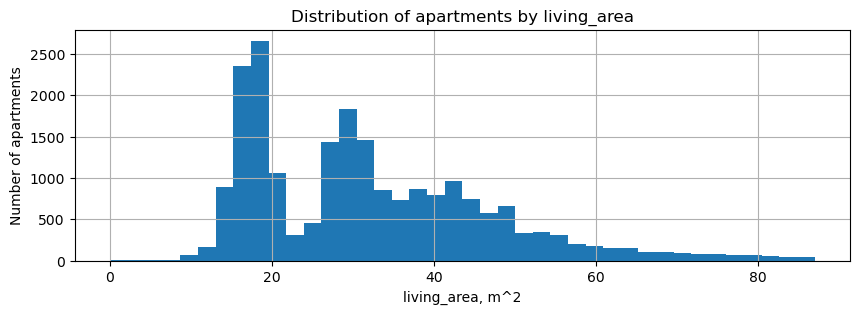

In [17]:
data['living_area'].hist(range=(0, data['living_area'].quantile(0.975)), bins=40, figsize=(10, 3))

plt.xlabel('living_area, m^2')
plt.ylabel('Number of apartments')
plt.title('Distribution of apartments by living_area')

plt.show()

The distribution of the data looks realistic. Filling in the values with averages would be a mistake. Let's look at the correlation with other features for possible filling using linear regression

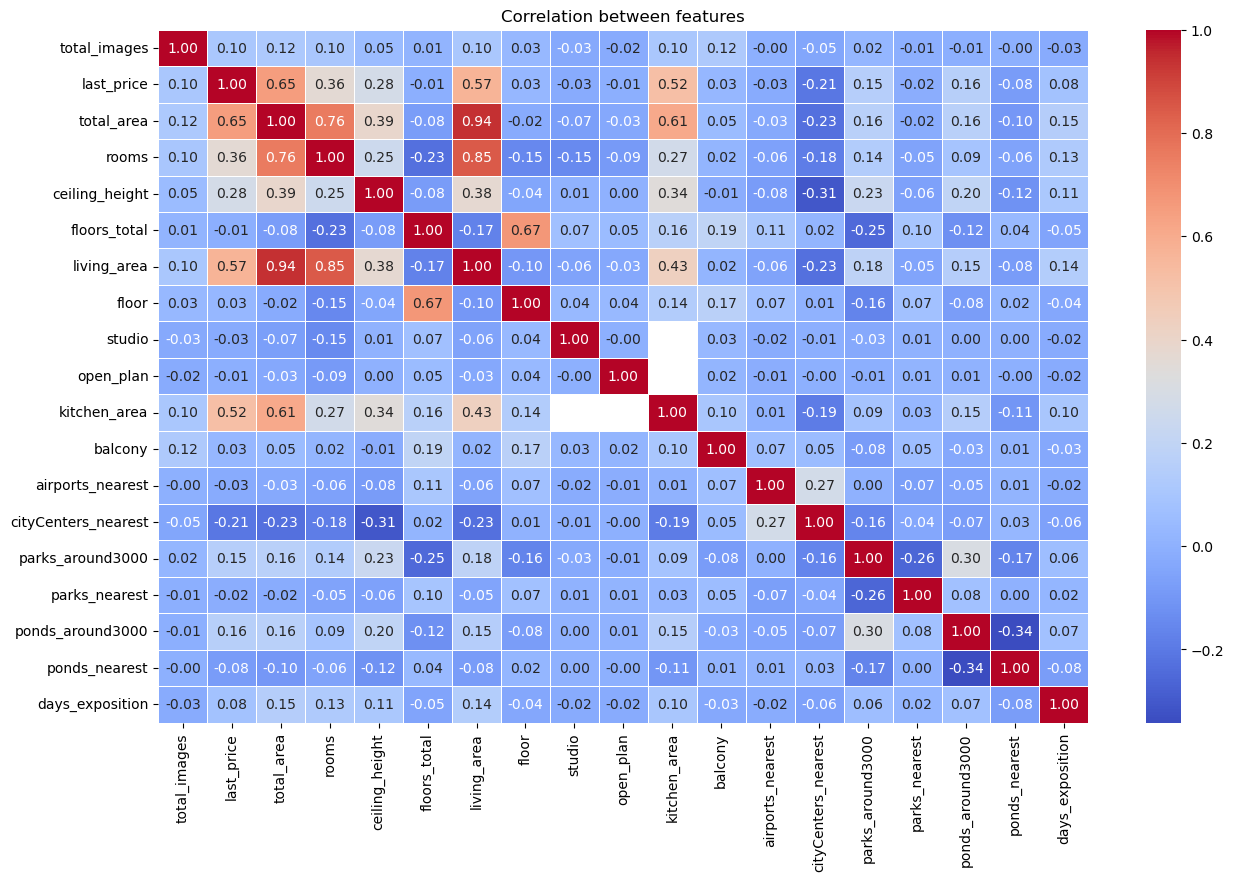

In [18]:
plt.figure(figsize=(15, 9))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.7, fmt=".2f")
plt.title('Correlation between features')
plt.show()

Prepare the data and train a linear regression

In [19]:
df = data.dropna(subset=['living_area'])

X = df[['total_area', 'rooms']]
y = df['living_area']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Let's build predictions for the missing data

In [20]:
missing_data = data[data['living_area'].isna()]

predicted_values = model.predict(missing_data[['total_area', 'rooms']])

# Fill in the missing values with the predicted values
data.loc[data['living_area'].isna(), 'living_area'] = predicted_values

In [21]:
data['living_area'].isna().sum()

0

## is_apartment

In [22]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

The share of apartments in the marked-up data is small (1.8%). Gaps in the data will be considered as non-apartment

In [23]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].describe()

count     23699
unique        2
top       False
freq      23649
Name: is_apartment, dtype: object

## kitchen_area

In [24]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

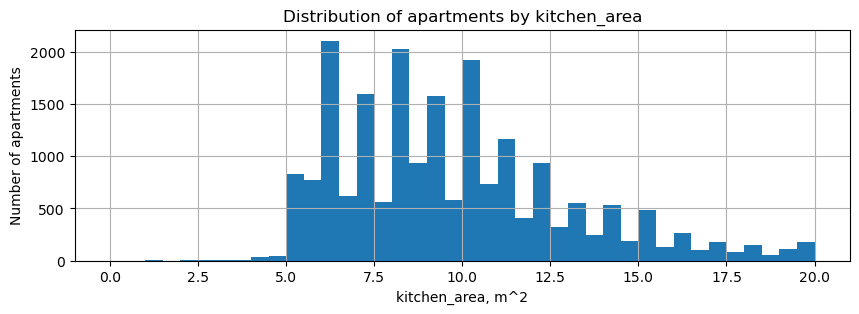

In [25]:
data['kitchen_area'].hist(range=(0, data['kitchen_area'].quantile(0.95)), bins=40, figsize=(10, 3))

plt.xlabel('kitchen_area, m^2')
plt.ylabel('Number of apartments')
plt.title('Distribution of apartments by kitchen_area')

plt.show()

The living area, may consist of any number of rooms and is limited from above only by the total area. 
The kitchen is one room and we can fill in the gaps in the data with the median value.

In [26]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

## balcony

In [27]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

The presence of a balcony is more often considered as some kind of advantage for a property. So we will assume that an skip in the data will mean no balcony

In [28]:
data['balcony'] = data['balcony'].fillna(0)

## locality_name

In [29]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [30]:
len(data['locality_name'].unique())

365

It is worth assuming that map features can replace this one (containing 365 manually maintained values and potentially containing misprints) without harming the project

## airports_nearest, cityCenters_nearest

In [31]:
data[['airports_nearest', 'cityCenters_nearest']].describe()

,airports_nearest,cityCenters_nearest
count,18157.000000,18180.000000
mean,28793.672193,14191.277833
std,12630.880622,8608.386210
min,0.000000,181.000000
25%,18585.000000,9238.000000
50%,26726.000000,13098.500000
75%,37273.000000,16293.000000
max,84869.000000,65968.000000


At the preprocessing stage, we do not fill in the gaps in the column data, as we need a deeper analysis of the causes. 

85 km and 66 km do not look like anomalies, so we will not remove them

## parks_around3000, ponds_around3000

In [32]:
data[['parks_around3000', 'ponds_around3000']].describe()

,parks_around3000,ponds_around3000
count,18181.000000,18181.000000
mean,0.611408,0.770255
std,0.802074,0.938346
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,3.000000,3.000000


Most likely, if the presence of parks and ponds in 3 km is not specified, then they are not and by analogy with balconies we can replace Nan with 0

In [33]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data[['parks_around3000', 'ponds_around3000']].describe()

,parks_around3000,ponds_around3000
count,23699.000000,23699.000000
mean,0.469049,0.590911
std,0.748534,0.883999
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,3.000000


## parks_nearest, ponds_nearest

As for the distance to the nearest park or pond, it is better to leave **Nan** and not replace them. Since it would be wrong to replace the geographical features with mean values.

## days_exposition

In [34]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

It can be assumed that omissions in the data mean that the ads had not been taken down as of the date the data was uploaded. Accordingly, this feature will be supplemented during subsequent data uploads from the source.

## Changing data types

Let's change data types, where values in columns take integer or Boolean values based on their description

In [35]:
data = data.astype({'last_price':'int64', 'is_apartment':'bool', 'balcony':'int64',\
                    'parks_around3000':'int64', 'ponds_around3000':'int64'})

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

## Check for explicit duplicates

Let's check for explicit duplicates in the data

In [37]:
df.duplicated().sum()

0

As we can see there were no explicit duplicates in the data

## Section 2 conclusions

- We managed to analyze and preprocess data for 14 out of 21 original data columns.

- For part of the columns the format was changed for further analysis (e.g., 'first_day_exposition')

- For majority of columns it was possible to fill the gaps with average values or constants (e.g. 'ceiling_height', 'balcony').

- And also some columns were left unchanged and the reasons why are described above

## Let's upload the processed dataframe for the second part of the project

In [38]:
data.to_csv('processed_data_real_estate_market.csv', index=False)